In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split


# To Train our data
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [226]:
!pip install xgboost

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sam\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 397, in _error_catcher
    yield
  File "C:\Users\sam\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 479, in read
    data = self._fp.read(amt)
  File "C:\Users\sam\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\sam\Anaconda3\lib\http\client.py", line 457, in read
    n = self.readinto(b)
  File "C:\Users\sam\Anaconda3\lib\http\client.py", line 501, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\sam\Anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\sam\Anaconda3\lib\ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\sam\Anaconda3\lib\ssl.py", line 929, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out



In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv(r'C:\Users\sam\Desktop\ab\data\AdSmartABdata.csv', engine = 'python')

In [3]:
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [81]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [ ]:
relevant_rows = df.query('yes == 1 | no == 1')

In [6]:
relevant_rows

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


In [77]:
#splitting data by browser, version and plat
platform_df = relevant_rows.iloc[:, [0,1,2,3,4,5,7,8]]
browser_df = relevant_rows.iloc[:, [0,1,2,3,4,6,7,8]]

# platform_df = relevant_rows.groupby('platform_os')
# browser_df = relevant_rows.groupby('browser')

In [78]:
#plat_df = platform_df.get_group(str(6))
platform_df

,auction_id,experiment,date,hour,device_make,platform_os,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,0,1
...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,0,1


In [79]:
# brow_df = browser_df.get_group(('Chrome Mobile WebView', 'Chrome Mobile'))
browser_df

,auction_id,experiment,date,hour,device_make,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,Chrome Mobile,0,1


In [82]:
browser_df.to_csv('../data/browser.csv')
platform_df.to_csv('../data/platform.csv')

In [152]:
#changing the targeted colums into 1 col
df2 = relevant_rows.drop('no', axis=1)

In [153]:
#renaming col because 0 means no and 1 means yes
df2.rename(columns = {'yes': 'clicked_or_not'}, inplace=True)
df2

,auction_id,experiment,date,hour,device_make,platform_os,browser,clicked_or_not
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0


In [154]:
# splitting colmuns int independent and dependent varibles
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [ ]:
#droping the auction id since it has no value for the train
df2.drop('auction_id', axis=1, inplace=True)

In [132]:
df3 = df2.copy()
df3

,experiment,date,hour,device_make,platform_os,browser,clicked_or_not
2,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
...,...,...,...,...,...,...,...
8059,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1
8063,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1
8064,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0
8069,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0


In [125]:
numerical_column = df2.select_dtypes(exclude="object").columns.tolist()
categorical_column = df2.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'clicked_or_not']
****************
Categorical Columns: ['experiment', 'date', 'device_make', 'browser']


In [142]:
# Get column names have less than 10 more than 2 unique values
to_one_hot_encoding = [col for col in categorical_column if df2[col].nunique() <= 10 and df2[col].nunique() > 2]

# Get Categorical Column names thoose are not in "to_one_hot_encoding"
to_label_encoding = [col for col in categorical_column if not col in to_one_hot_encoding]

print("To One Hot Encoding:", to_one_hot_encoding)
print("To Label Encoding:", to_label_encoding)

To One Hot Encoding: ['date', 'browser']
To Label Encoding: ['experiment', 'device_make']


In [145]:
df3 = df2.copy()
df3.shape

(1243, 7)

In [146]:
# We will use built in pandas function "get_dummies()" to simply to encode "to_one_hot_encoding" columns
one_hot_encoded_columns = pd.get_dummies(df2[to_one_hot_encoding])
one_hot_encoded_columns

,date_2020-07-03,date_2020-07-04,date_2020-07-05,date_2020-07-06,date_2020-07-07,date_2020-07-08,date_2020-07-09,date_2020-07-10,browser_Chrome,browser_Chrome Mobile,browser_Chrome Mobile WebView,browser_Chrome Mobile iOS,browser_Facebook,browser_Mobile Safari,browser_Mobile Safari UI/WKWebView,browser_Samsung Internet
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
27,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8063,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8064,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8069,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [147]:
le = LabelEncoder()
df3[to_label_encoding] = df3[to_label_encoding].apply(le.fit_transform)
df3

,experiment,date,hour,device_make,platform_os,browser,clicked_or_not
2,1,2020-07-05,2,4,6,Chrome Mobile WebView,0
16,1,2020-07-04,16,13,6,Chrome Mobile,1
20,1,2020-07-06,8,13,6,Chrome Mobile,0
23,0,2020-07-08,4,43,6,Facebook,1
27,0,2020-07-03,15,13,6,Chrome Mobile,0
...,...,...,...,...,...,...,...
8059,1,2020-07-05,21,13,6,Chrome Mobile,1
8063,1,2020-07-04,1,13,6,Chrome Mobile,1
8064,0,2020-07-09,7,13,6,Chrome Mobile,0
8069,0,2020-07-10,16,13,6,Chrome Mobile,0


In [ ]:
# # Label Encoding

# label_encoded_columns = []
# # For loop for each columns
# for col in to_label_encoding:
#     # We define new label encoder to each new column
#     le = LabelEncoder()
#     # Encode our data and create new Dataframe of it, 
#     # notice that we gave column name in "columns" arguments
#     column_dataframe = pd.DataFrame(le.fit_transform(df2[col]), columns=[col] )
#     # and add new DataFrame to "label_encoded_columns" list
#     label_encoded_columns.append(column_dataframe)

# # Merge all data frames
# label_encoded_columns = pd.concat(label_encoded_columns, axis=1)
# label_encoded_columns

In [138]:
# Copy our DataFrame to X variable
df3 = df2.copy()
df3.shape()

(1243, 7)

In [150]:
# Droping Categorical Columns,
# "inplace" means replace our data with new one
# Don't forget to "axis=1"
df3.drop(['date', 'browser'], axis=1, inplace=True)
df3.shape

(1243, 21)

In [148]:
df3 = pd.concat([df3, one_hot_encoded_columns], axis=1)
df3.shape

(1243, 23)

In [156]:
print("All columns:", df3.columns.tolist())
df3

All columns: ['experiment', 'hour', 'device_make', 'platform_os', 'clicked_or_not', 'date_2020-07-03', 'date_2020-07-04', 'date_2020-07-05', 'date_2020-07-06', 'date_2020-07-07', 'date_2020-07-08', 'date_2020-07-09', 'date_2020-07-10', 'browser_Chrome', 'browser_Chrome Mobile', 'browser_Chrome Mobile WebView', 'browser_Chrome Mobile iOS', 'browser_Facebook', 'browser_Mobile Safari', 'browser_Mobile Safari UI/WKWebView', 'browser_Samsung Internet']


,experiment,hour,device_make,platform_os,clicked_or_not,date_2020-07-03,date_2020-07-04,date_2020-07-05,date_2020-07-06,date_2020-07-07,date_2020-07-08,date_2020-07-09,date_2020-07-10,browser_Chrome,browser_Chrome Mobile,browser_Chrome Mobile WebView,browser_Chrome Mobile iOS,browser_Facebook,browser_Mobile Safari,browser_Mobile Safari UI/WKWebView,browser_Samsung Internet
2,1,2,4,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
16,1,16,13,6,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20,1,8,13,6,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
23,0,4,43,6,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
27,0,15,13,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,1,21,13,6,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8063,1,1,13,6,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8064,0,7,13,6,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8069,0,16,13,6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [262]:
# splitting colmuns int independent and dependent varibles
y = df3['clicked_or_not']
X = df3.drop(["clicked_or_not"], axis=1)


In [257]:
col_name = X.columns.values.tolist()
col_name[0]

'experiment'

In [263]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [264]:
#spliting the 10 percent for the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [265]:
print(X_train.shape)
print(X_test.shape)

(1118, 20)
(125, 20)


In [266]:
#spliting the 20 percent for the validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.23)

In [267]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(860, 20)
(125, 20)
(258, 20)


# Logistic Regression

In [268]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logReg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[45  7]
 [62 11]]


0.448

In [270]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
y_pred = logReg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

0.4108527131782946
0.640977935016717


In [271]:
#doing k-fold cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logReg, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 51.98 %
Standard Deviation: 1.24 %


experiment , Score: 0.02223
experiment , Score: 0.14669
experiment , Score: 0.03822
experiment , Score: -0.22218
experiment , Score: -0.02195
experiment , Score: 0.04341
experiment , Score: 0.03646
experiment , Score: 0.07633
experiment , Score: -0.05495
experiment , Score: -0.03656
experiment , Score: 0.00086
experiment , Score: -0.02460
experiment , Score: 0.19854
experiment , Score: 0.02964
experiment , Score: 0.06723
experiment , Score: 0.11103
experiment , Score: -0.00582
experiment , Score: -0.27531
experiment , Score: -0.33928
experiment , Score: -0.01297


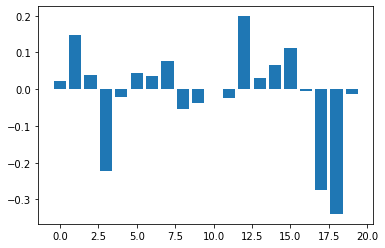

In [272]:
# get importance
importance = logReg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print(col_name[0], ', Score: %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Decision_tree

In [234]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [235]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[44 15]
 [37 29]]


0.584

In [236]:
#doing k-fold cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.47 %
Standard Deviation: 2.92 %


In [237]:
y_pred = dtc.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

0.4806201550387597
0.6932677369088798


Feature: 0, Score: 0.08519
Feature: 1, Score: 0.33347
Feature: 2, Score: 0.24991
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.03850
Feature: 5, Score: 0.03888
Feature: 6, Score: 0.03511
Feature: 7, Score: 0.02037
Feature: 8, Score: 0.02702
Feature: 9, Score: 0.03666
Feature: 10, Score: 0.02954
Feature: 11, Score: 0.03238
Feature: 12, Score: 0.00146
Feature: 13, Score: 0.02044
Feature: 14, Score: 0.03027
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.01235
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00843


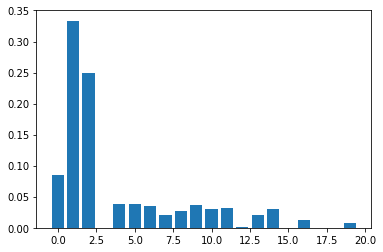

In [241]:
importance = dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [243]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[39 20]
 [30 36]]


0.6

In [244]:
#doing k-fold cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 47.20 %
Standard Deviation: 3.96 %


In [245]:
y_pred = rfc.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

0.4418604651162791
0.6647258571142536


Feature: 0, Score: 0.05466
Feature: 1, Score: 0.48567
Feature: 2, Score: 0.27775
Feature: 3, Score: 0.00341
Feature: 4, Score: 0.01490
Feature: 5, Score: 0.01299
Feature: 6, Score: 0.01349
Feature: 7, Score: 0.01464
Feature: 8, Score: 0.01344
Feature: 9, Score: 0.01760
Feature: 10, Score: 0.01522
Feature: 11, Score: 0.01761
Feature: 12, Score: 0.00105
Feature: 13, Score: 0.01530
Feature: 14, Score: 0.01695
Feature: 15, Score: 0.00031
Feature: 16, Score: 0.00864
Feature: 17, Score: 0.00216
Feature: 18, Score: 0.00089
Feature: 19, Score: 0.01331


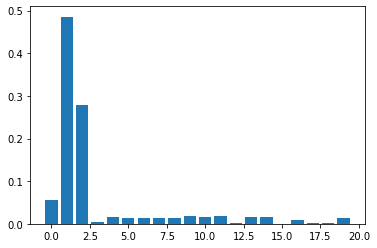

In [247]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# XGBOOST

In [ ]:
from xgboost import XGBClassifer
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()